<a href="https://colab.research.google.com/github/Johnnierb/pymaterialsnb/blob/master/Copy_of_pycalphadfor_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A notebook for running pycalphad using colaboratory

## First install dependencies SymEngine and ipopt using the following code

In [ ]:
!pip install SymEngine

     |████████████████████████████████| 12.8MB 328kB/s 


In [ ]:
!apt install coinor-libipopt-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libipopt1v5 libmumps-5.1.2 libmumps-dev libmumps-seq-5.1.2
  libmumps-seq-dev libscalapack-mpi-dev libscalapack-openmpi-dev
  libscalapack-openmpi2.0 libscotch-6.0
Suggested packages:
  scalapack-doc
The following NEW packages will be installed:
  coinor-libipopt-dev coinor-libipopt1v5 libmumps-5.1.2 libmumps-dev
  libmumps-seq-5.1.2 libmumps-seq-dev libscalapack-mpi-dev
  libscalapack-openmpi-dev libscalapack-openmpi2.0 libscotch-6.0
0 upgraded, 10 newly installed, 0 to remove and 16 not upgraded.
Need to get 7,515 kB of archives.
After this operation, 50.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libscalapack-openmpi2.0 amd64 2.0.2-4 [1,473 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmumps-5.1.2 amd64 5.1.2-4 [1,103 kB]
Get:3 http://archive.ubu

In [ ]:
!pip install ipopt

     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for ipopt: filename=ipopt-0.3.0-cp36-cp36m-linux_x86_64.whl size=317391 sha256=9b5dbd07f4a27dc698eb3dd25edebdeb20f266a4a936c2e4910eeeb086156865
  Stored in directory: /root/.cache/pip/wheels/4b/e5/ca/d7cd68c7782de418337523e6781ff7419306c7c37df3b029b0
Successfully built ipopt


## Next install pycalphad

In [ ]:
!pip install pycalphad

     |████████████████████████████████| 1.1MB 5.6MB/s 
     |████████████████████████████████| 5.6MB 26.1MB/s 
  Created wheel for pycalphad: filename=pycalphad-0.8.4-cp36-cp36m-linux_x86_64.whl size=2173763 sha256=8385688fdaabea2f0899437b6950bb047c9e7143517901b2c7b66e3fe23d07ca
  Stored in directory: /root/.cache/pip/wheels/97/4c/64/9bc76fcaa04ba5c5bad1ef28ca7afa7dad699345c7ad938ec0
Successfully built pycalphad
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


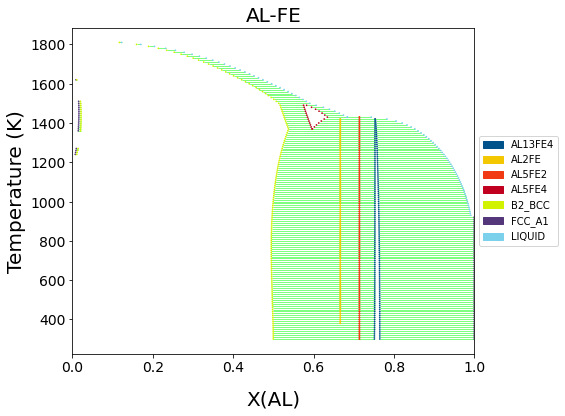

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

db_alfe = Database('/content/drive/MyDrive/alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'B2_BCC', 'FCC_A1', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4']

fig = plt.figure(figsize=(9,6))
axes = fig.gca()

binplot(db_alfe, ['AL', 'FE', 'VA'] , my_phases_alfe, {v.X('AL'):(0,1,0.01), v.T: (300, 2000, 10), v.P:101325}, 
        plot_kwargs={'ax': axes, 'tielines': True })

plt.show()

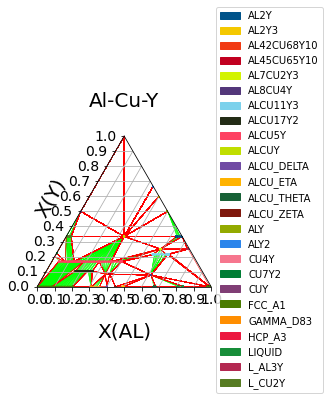

In [ ]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db_al_cu_y = Database('/content/drive/MyDrive/Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325, v.X('AL'): (0,1,0.015), v.X('Y'): (0,1,0.015)}

ternplot(db_al_cu_y, comps, phases, conds, x=v.X('AL'), y=v.X('Y'))

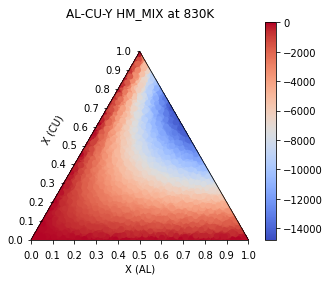

In [ ]:
import matplotlib.pyplot as plt
from pycalphad.plot import triangular
from pycalphad import calculate

# some sample data, these could be from an equilibrium calculation or a property model.
# here we are calculating the mixing enthlapy of the FCC_A1 phase at 830K.
c = calculate(db_al_cu_y, comps, 'FCC_A1', output='HM_MIX', T=830, P=101325, pdens=5000)

# Here we are getting the values from our plot.
xs = c.X.values[0, 0, 0, :, 0]  # 1D array of Al compositions
ys = c.X.values[0, 0, 0, :, 1]  # 1D array of Cu compositions
zs = c.HM_MIX.values[0, 0, 0, :]  # 1D array of mixing enthalpies at these compositions

# when we imported the pycalphad.plot.triangular module, it made the 'triangular' projection available for us to use.
fig = plt.figure()
ax = fig.gca(projection='triangular')
ax.scatter(xs, ys, c=zs,
           cmap='coolwarm',
           linewidth=0.0)

# label the figure
ax.set_xlabel('X (AL)')
ax.set_ylabel('X (CU)')
ax.yaxis.label.set_rotation(60)  # rotate ylabel
ax.yaxis.set_label_coords(x=0.12, y=0.5)  # move the label to a pleasing position
ax.set_title('AL-CU-Y HM_MIX at 830K')

# set up the colorbar
cm = plt.cm.ScalarMappable(cmap='coolwarm')
cm.set_array(zs)
fig.colorbar(cm)